<a href="https://colab.research.google.com/github/NihilisticMotif/Data-Science-Documentation/blob/main/Data-Science-Documentation/Project/ReverseEngineer_DataScience_Project/KaggleProject01_BostonHousing_by_TOLGAHANCEPEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**To Do Now:**
1. Train Linear Regression with training and testing data
2. Implementing Polynomial Regression
3. Explain how `df.corr` work?
4. Explain the goal of this project (https://www.kaggle.com/code/tolgahancepel/boston-housing-regression-analysis/notebook) 
5. Explain about this (https://www.kaggle.com/code/alexisbcook/cross-validation)
6. Improve Linear Regression tutorial.

###Note: 

This project is based on this project (https://www.kaggle.com/code/tolgahancepel/boston-housing-regression-analysis/notebook). The purpose of this project is to learn machine learning based on other people's data science project.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#Step 1, Import data and library

**Note:** In this project, I will only use those libraries, in order to practice machine learning skill.
* `from google.colab import drive`
* `import math`
* `import pandas as pd`
* `import numpy as np`
* `import matplotlib.pyplot as plt`

**About Dataset:**

Concerns housing values in suburbs of Boston. (a city in Northeastern United States)

**Note**
* Number of Instances: 506
* Number of Attributes: 13 continuous attributes (including "class"
attribute "MEDV"), 1 binary-valued attribute.
* Missing Attribute Values: None.

**Attribute Information:**
* `df.columns[0]=` CRIM = crime rate by town
* `df.columns[1]=` ZN = proportion of residential land zoned for lots over
25,000 sq.ft.
* `df.columns[2]=` INDUS = proportion of non-retail business acres per town
* `df.columns[3]=` CHAS = Charles River dummy variable (= 1 if tract bounds
river; 0 otherwise)
* `df.columns[4]=` NOX = nitric oxides concentration (parts per 10 million)
* `df.columns[5]=` RM = average number of rooms per dwelling
* `df.columns[6]=` AGE = proportion of owner-occupied units built prior to 1940
* `df.columns[7]=` DIS = weighted distances to five Boston employment centres
* `df.columns[8]=` RAD = index of accessibility to radial highways
* `df.columns[9]=` TAX = full-value property-tax rate per \$10,000
* `df.columns[10]=` PTRATIO = pupil-teacher ratio by town
* `df.columns[11]=` B = $1000(B_k - 0.63)^2$ where $B_k$ is the proportion of blacks
by town
* `df.columns[12]=` LSTAT = % lower status of the population
* `df.columns[13]=` MEDV = Median value of owner-occupied homes in \$1000's

**Keyword**
* residential (ADJ) = designed for people to live in.
* non-retail business (N) = a business, including an office, warehouse, or other space that does not sell or provide goods or services directly to the ultimate consumer or user.
* tract bounds = the boundaries or limits of a tract of land especially as described by reference to lines and distances between points on the land.
* tract (N) = an area of indefinite extent, typically a large one.
* dummy variable (N) = a variable that takes the values 0 or 1 to indicate the absence or presence of some categorical effect
* dwelling (N) = a house, apartment, or other place of residence.
* prior (ADJ) = existing or coming before in time, order, or importance.
* occupied (ADJ) = (of a building, seat, etc.) being used by someone.
* The weighted arithmetic mean is similar to an ordinary arithmetic mean (the most common type of average), except that instead of each of the data points contributing equally to the final average, some data points contribute more than others. (https://en.wikipedia.org/wiki/Weighted_arithmetic_mean)
* weighted distances = The distance-weighted mean is *a measure of central tendency*, a special case of weighted mean, where weighting coefficient for each data point is computed as the inverse sum of distances between this data point and the other data points[1]. Thus, central observations in a dataset get the highest weights, while values in the tails of a distribution are downweighted. *In other words, data points close to other data points carry more weight than isolated datapoints.* (https://encyclopediaofmath.org/wiki/Distance-weighted_mean)
* Radial highway = a highway leading to or from an urban center.
* pupil = a student in school.
* Median (ADJ) = denoting or relating to a value or quantity lying at the midpoint of a frequency distribution of observed values or quantities

Source of the data set: https://www.kaggle.com/datasets/arslanali4343/real-estate-dataset

In [42]:
from google.colab import drive

import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

drive.mount('/content/drive')

path='/content/drive/MyDrive/Data-Science-Documentation/DataSet/K_RealEstate01_ArslanAli.csv'

df = pd.read_csv(path)
df.astype(float)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,0.98765,0.0,12.50,0.0,0.561,6.980,89.0,2.0980,3.0,320.0,23.0,396.00,12.00,12.0
507,0.23456,0.0,12.50,0.0,0.561,6.980,76.0,2.6540,3.0,320.0,23.0,343.00,25.00,32.0
508,0.44433,0.0,12.50,0.0,0.561,6.123,98.0,2.9870,3.0,320.0,23.0,343.00,21.00,54.0
509,0.77763,0.0,12.70,0.0,0.561,6.222,34.0,2.5430,3.0,329.0,23.0,343.00,76.00,67.0


#Step 2, Visualize the data

###Step 2.1 Visualize Standard Deriation of the data.

**(1.) Plot and view the data**

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


<Axes: >

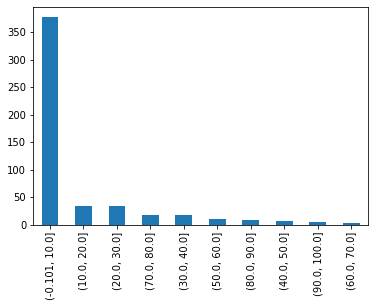

In [ ]:
# This code count the frequency of value
# x axis = value (value of the data)
# y axis = fequency (how often the data have the same value)

space=10
name='ZN'
df[name].value_counts(bins=space)

fig, ax = plt.subplots()
df[name].value_counts(bins=space).plot(ax=ax, kind='bar')

In [ ]:

print('This code indicate the general information about the particular column')
name='ZN'
print(df[name].describe())


'''print('This code show mean and Standard Deviation of every column')
for i in df.columns:
  print('column name = '+str(i))
  print('mean = '+str(df[i].mean()))
  print('std = '+str(df[i].std()))'''


This code indicate the general information about the particular column
count    511.000000
mean      11.252446
std       23.234838
min        0.000000
25%        0.000000
50%        0.000000
75%       12.500000
max      100.000000
Name: ZN, dtype: float64


"print('This code show mean and Standard Deviation of every column')\nfor i in df.columns:\n  print('column name = '+str(i))\n  print('mean = '+str(df[i].mean()))\n  print('std = '+str(df[i].std()))"

**What is StandardDeriation?**

* A standard deviation (or σ) = a measure of how dispersed the data is in relation to the mean. (Read "StandardDeviation.ipynb" for more detail.)

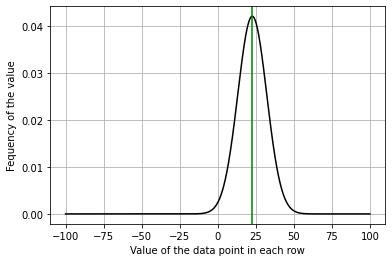

In [ ]:
def BellCurve(Data, Domain=np.arange(-100,100,0.01)):
  XLine=Domain
  YLine=(np.exp(-(1/2)*pow((XLine-Data.mean())/Data.std(),2)))/(math.sqrt(np.pi*2)*Data.std())
  return [XLine,YLine]

name=df.columns[-1]
fx=BellCurve(df[name])

plt.plot(fx[0],fx[1],color='black')
#plt.axvline(df[name].mean()-0.675*StandardDeviation(df[name]),color='red') # reference: https://stackoverflow.com/questions/24988448/how-to-draw-vertical-lines-on-a-given-plot
plt.axvline(df[name].mean(),color='green')
#plt.axvline(df[name].mean()+0.675*StandardDeviation(df[name]),color='blue') # reference: https://www.statology.org/find-quartiles-with-mean-standard-deviation/
plt.xlabel("Value of the data point in each row")
plt.ylabel("Fequency of the value")
plt.grid()
plt.show()

###Step 2.1 Visualize Correlation between different groups of data.

In [ ]:
def ttt(time=100):
  limit=0
  while limit<100:
    print(limit)
    limit+=1
ttt()

In [ ]:
print(df[df.columns[1]])

0      18.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
506     0.0
507     0.0
508     0.0
509     0.0
510     0.0
Name: ZN, Length: 511, dtype: float64


In [ ]:
name00=df.columns[2]
name01=df.columns[1]

print(df[name00,name01])

In [ ]:
print(len(df.columns))

14


In [ ]:
print(df.corr())

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.198451  0.405524 -0.054906  0.420524 -0.220363  0.350847   
ZN      -0.198451  1.000000 -0.534106 -0.041333 -0.516256  0.307812 -0.567796   
INDUS    0.405524 -0.534106  1.000000  0.062332  0.763583 -0.392193  0.642817   
CHAS    -0.054906 -0.041333  0.062332  1.000000  0.091023  0.089952  0.085814   
NOX      0.420524 -0.516256  0.763583  0.091023  1.000000 -0.301778  0.729233   
RM      -0.220363  0.307812 -0.392193  0.089952 -0.301778  1.000000 -0.237335   
AGE      0.350847 -0.567796  0.642817  0.085814  0.729233 -0.237335  1.000000   
DIS     -0.377028  0.665185 -0.707886 -0.097541 -0.768309  0.199853 -0.745097   
RAD      0.625964 -0.307146  0.591784 -0.005343  0.609343 -0.213078  0.452229   
TAX      0.583389 -0.311531  0.718764 -0.034244  0.666982 -0.293969  0.503360   
PTRATIO  0.276695 -0.392844  0.379441 -0.124415  0.186073 -0.339755  0.258251   
B       -0.384356  0.175637 

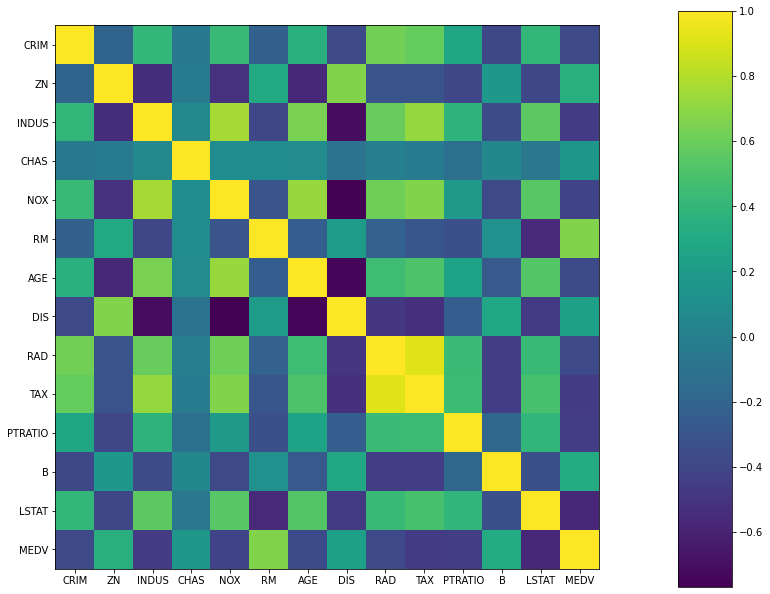

In [ ]:
corr = df.corr()

fig, ax = plt.subplots(figsize=(10, 10))

plt.imshow(corr,interpolation='nearest')

plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)

cax = plt.axes([1, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)

plt.show()

#Step 3, Choose the Machine Learning Algorithms

###Step 3.1, Seperate Training and Testing data

In [37]:
def SeparateData(data,Ratio,intY):
  name=data.columns[intY]

  DataRatio = int(data.shape[0]*Ratio)
  Data=data.sample(frac = 1)
  TrainD= Data.iloc[:DataRatio]
  TesttD= Data.iloc[DataRatio:]

  TrainX=TrainD.drop(name, axis=1)
  TrainY=TrainD[name]
  TesttX=TesttD.drop(df.columns[13], axis=1)
  TesttY=TesttD[df.columns[13]]
  return [TrainX,TrainY,TesttX,TesttY]

DataD=SeparateData(df,0.75,-1)
TrainX=DataD[0]
TrainY=DataD[1]
TesttX=DataD[2]
TesttY=DataD[3]

# print('TrainX')
# print(TrainX)
# print('TrainY')
# print(TrainY)
# print('TesttX')
# print(TesttX)
# print('TesttY')
# print(TesttY)

TrainX
         CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  \
255   0.03548  80.0   3.64     0  0.392  5.876   19.1  9.2203    1  315   
381  15.87440   0.0  18.10     0  0.671  6.545   99.1  1.5192   24  666   
373  11.10810   0.0  18.10     0  0.668  4.906  100.0  1.1742   24  666   
191   0.06911  45.0   3.44     0  0.437  6.739   30.8  6.4798    5  398   
306   0.07503  33.0   2.18     0  0.472  7.420   71.9  3.0992    7  222   
..        ...   ...    ...   ...    ...    ...    ...     ...  ...  ...   
237   0.51183   0.0   6.20     0  0.507  7.358   71.6  4.1480    8  307   
427  37.66190   0.0  18.10     0  0.679  6.202   78.7  1.8629   24  666   
363   4.22239   0.0  18.10     1  0.770  5.803   89.0  1.9047   24  666   
92    0.04203  28.0  15.04     0  0.464  6.442   53.6  3.6659    4  270   
423   7.05042   0.0  18.10     0  0.614  6.103   85.1  2.0218   24  666   

     PTRATIO       B  LSTAT  
255     16.4  395.18   9.25  
381     20.2  396.90  21.08  
37

Reference:
* https://www.kaggle.com/code/alexisbcook/cross-validation

###Step 3.2 Linear Regression

**Keyword**
* Epoch = a single full iteration of the algorithm over the training data. (https://medium.com/@niitwork0921/what-is-epoch-in-machine-learning-1062064d42d6)

**What is linear Regression?**

Linear regression is a machine learning model which is used for predicting the relationship between value x and value y, based on the given data on the graph.

**Hypothesis (Data Prediction) Function of Linear Regression**
* $h(\vec{x})=\vec{h}\cdot\vec{x}, x_0=1$

**Evaluation Function of Linear Regression**
* $J(\vec{h})=\frac{1}{2m}\sum_{i=1}^m(h(x_i)-y_i)^2$
* $\frac{\partial }{\partial h_{i}}J(\vec{h})=\frac{1}{m}*\Sigma_{i=0}^m(hx_i-y_i)*x_i$

**GradientDescent (Accuracy Optimize Function)**
* $h_{i} := h_{i}-a*\frac{\partial }{\partial h_{i}}J(\vec{h})$

In [ ]:
name00=df.columns[2]
name01=df.columns[1]

#def LinearRegression_Hypothesis():

def LineR_Evaluation(data,Vector):
  sigma =0
  for i in range(data.shape[0]):
    sigma +=pow((data[0]*Vector[1]+Vector[0]-data[1]),2)
  return (1/(2*data.shape[0]))*sigma

def LineR_DiffEvaluation(data,Vector):
  res = Vector[1] * data[0] + Vector[0] - data[1]
  return [res.mean(),(res*data[0]).mean()]
  # reference: https://mccormickml.com/2014/03/04/gradient-descent-derivation/

def GradientDescent(data,Diff,LRate=0.008,Decay=0.0002,InitialVector=[0.5,0.5],LastEpoch=10000, AcceptError=1e-10):
  epoch=0
  Vector=np.array(InitialVector)
  while epoch<LastEpoch or np.all(np.abs(Diff(data,Vector))<=AcceptError):
    print(Vector)
    Vector-=LRate*pow((1-Decay),epoch)*np.array(Diff(data,Vector))
    # Slowly decrease learning rate.
    # reference: https://www.thoughtco.com/exponential-decay-definition-2312215
    epoch+=1
  return list(Vector)

h_i=GradientDescent([df[name00], df[name01]],LineR_DiffEvaluation)
print(h_i)

**Matrix Multiplication**

$R\times C=P$

$\vec{r_i}\cdot\vec{c_j}=p_{i,j}$

* $R\in\mathbb{R^{n\times m}}$
* $C\in\mathbb{R^{m\times q}}$
* $P\in\mathbb{R^{n\times q}}$
* $\vec{r_i}=$ row vector inside $R$ no.$i$
* $\vec{c_j}=$ column vector inside $R$ no.$j$
* $i,j\in\mathbb{Z}$
* $i\in[1,n]$
* $j\in[1,p]$

reference: https://www.mathsisfun.com/algebra/matrix-multiplying.html

**Given that**
* $\vec{h}\in\mathbb{R^{n+1}}$
* $X\in\mathbb{R^{m\times n}}$
* $[X+\vec{1}]\in\mathbb{R^{m\times n+1}},\vec{1}\in\mathbb{R^m}$
* $[X+\vec{1}]=$ add vector that contains only $1$ into $X$ as the new column of $X$
* $[X+\vec{1}]^T\in\mathbb{R^{n+1\times m}}$
* $\vec{h}*[X+\vec{1}]^T\in\mathbb{R^{}}$

In [44]:
TrainX['One']=1
Tran=TrainX.T

print(Tran)

               255       381       373        191        306        194  \
CRIM       0.03548   15.8744   11.1081    0.06911    0.07503    0.01439   
ZN        80.00000    0.0000    0.0000   45.00000   33.00000   60.00000   
INDUS      3.64000   18.1000   18.1000    3.44000    2.18000    2.93000   
CHAS       0.00000    0.0000    0.0000    0.00000    0.00000    0.00000   
NOX        0.39200    0.6710    0.6680    0.43700    0.47200    0.40100   
RM         5.87600    6.5450    4.9060    6.73900    7.42000    6.60400   
AGE       19.10000   99.1000  100.0000   30.80000   71.90000   18.80000   
DIS        9.22030    1.5192    1.1742    6.47980    3.09920    6.21960   
RAD        1.00000   24.0000   24.0000    5.00000    7.00000    1.00000   
TAX      315.00000  666.0000  666.0000  398.00000  222.00000  265.00000   
PTRATIO   16.40000   20.2000   20.2000   15.20000   18.40000   15.60000   
B        395.18000  396.9000  396.9000  389.71000  396.90000  376.70000   
LSTAT      9.25000   21.0

In [34]:
name00=df.columns[2]
name01=df.columns[1]

#def LinearRegression_Hypothesis():

def LineR_Evaluation(dX,dY,Vector):
  sigma =0
  for i in range(dY.shape[0]):
    sigma +=pow((dX*Vector[1]+Vector[0]-dY),2)
  return (1/(2*dY.shape[0]))*sigma

def LineR_DiffEvaluation(dX,dY,Vector):
  Coef_Dot = #... + Vector[1] * dX[dX.columns[0]] + Vector[1] * dX[dX.columns[0]] + Vector[0] - dY
  theDottt = 
  return [res.mean(),(res*dX[dX.columns[0]]).mean(),(res*dX[dX.columns[1]]).mean(),...]
  # reference: https://mccormickml.com/2014/03/04/gradient-descent-derivation/

def GradientDescent(dX,dY,Diff,LRate=0.008,Decay=0.0002,LastEpoch=10000, AcceptError=1e-10):
  epoch=0
  Vector=np.ones(len(dX.columns)+1)
  #Coef_Vect=np.ones(len(dX.columns))
  #Inte_Cons=1
  while epoch<LastEpoch or np.all(np.abs(Diff(dX,dY,Vector))<=AcceptError):
    Vector-=LRate*pow((1-Decay),epoch)*np.array(Diff(dX,dY,Vector))
    #print(Vector)
    #Coef_Vect-=LRate*pow((1-Decay),epoch)*np.array(Diff(dX,dY,Vector))
    #Inte_Cons-=LRate*pow((1-Decay),epoch)*np.array(Diff(dX,dY,Vector))
    # Slowly decrease learning rate.
    # reference: https://www.thoughtco.com/exponential-decay-definition-2312215
    epoch+=1
  return list(Vector)

'''
TrainX
TrainY
TesttX
TesttY
'''

h_i=GradientDescent(TrainX,TrainY,LineR_DiffEvaluation)
print(h_i)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


ValueError: ignored

**Compare the code**

In [ ]:
print(h_i)
# [31.51638752159319, -1.8172786483055543]

from sklearn.linear_model import LinearRegression

regr = LinearRegression()
  
regr.fit(np.array(df[name00]).reshape(-1, 1), np.array(df[name01]).reshape(-1, 1))

print(regr.intercept_,regr.coef_[0])
# [31.51899535] [-1.8174491]

[31.51638752159319, -1.8172786483055543]
[31.51899535] [-1.8174491]


In [ ]:
def LineR_Evaluation(data,Vector):
  sigma =0
  for i in range(data[0].shape[0]):
    sigma +=pow((data[0].iloc[i]*Vector[1]+Vector[0]-data[1].iloc[i]),2)
  return (1/(2*data[0].shape[0]))*sigma

print(LineR_Evaluation([df[name00], df[name01]],h_i))
print(LineR_Evaluation([df[name00], df[name01]],[regr.intercept_,regr.coef_[0]]))

192.54900170718594
[192.54900078]


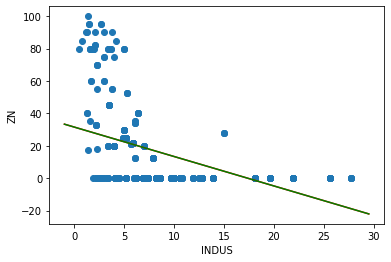

In [ ]:
plt.scatter(df[name00],df[name01])
xline=np.arange(-1, 30, 0.5)
plt.plot(xline,xline*h_i[1]+h_i[0],color='red')
plt.plot(xline,xline*regr.coef_[0]+regr.intercept_,color='green')
plt.xlabel(name00)
plt.ylabel(name01)
plt.show()

In [ ]:
print(h_i)

[21.033493057457676, -1.1321090702497214]


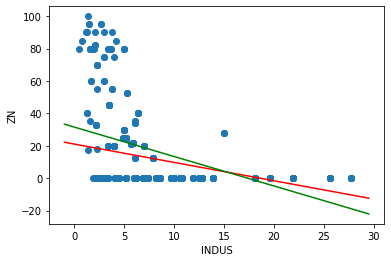

In [ ]:
plt.scatter(df[name00],df[name01])
xline=np.arange(-1, 30, 0.5)
plt.plot(xline,xline*h_i[1]+h_i[0],color='red')
plt.plot(xline,xline*(regr.coef_[0])+regr.intercept_,color='green')
plt.xlabel(name00)
plt.ylabel(name01)
plt.show()

In [ ]:
name00=df.columns[2]
name01=df.columns[1]
Ratio = 0.75
DataRatio = int(df.shape[0]*Ratio)
X_Train = df[[name00]].sample(frac = 1).iloc[:DataRatio,:]
Y_Train = df[[name01]].sample(frac = 1).iloc[:DataRatio,:]
X_Test  = df[[name00]].sample(frac = 1).iloc[DataRatio:,:]
Y_Test  = df[[name01]].sample(frac = 1).iloc[DataRatio:,:]